


 **Malaria Cell Detection**


---


 by Karthik Kumareshan

 Student ID : w23060061

**Table of Contents**

1. Introduction
2. Dataset Description
3. Data Preprocessing
4. Model Architecture
5. Explanation of the Improved CNN Model and Summary
6. Hyperparameter Tuning for Improved Results
7. Training and Evaluation -Confusion matrix and ROC,PR cirve
8. Comparison with VGG16, ResNet50, and InceptionV3:
9. Results
10. Critical Evaluation
11. Conclusion
12. References



**Introduction**





Malaria is a fatal illness that is transmitted to humans by parasites that are carried by infected female Anopheles mosquitoes(Jdey, Hcini and Ltifi, 2022). Most efficient treatment can be provided if there is a precise and appropriate diagnosis of malaria(Jdey, Hcini and Ltifi, 2022). The latest development in machine learning and deep learning has made it feasible to develop automated diagnostics systems that can help in early detection of malaria. The aim of this project is to build a Convolutional Neural Network (CNN) model to detect malaria through cell images and evaluate its performance agains other state-of-the-art models such as VGG16, ResNet50, and InceptionV3.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C45P6ThinF_IMG_20151130_155011_cell_171.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C68P29N_ThinF_IMG_20150819_134625_cell_6.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C45P6ThinF_IMG_20151130_160409_cell_190.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C132P93ThinF_IMG_20151004_152045_cell_136.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C49P10thinF_IMG_20150724_102951_cell_208.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C180P141NThinF_IMG_20151201_165423_cell_173.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C104P65ThinF_IMG_20150918_171154_cell_213.png
/kaggle/input/cell-images-for-detecting-mal

In [80]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


The import statements include essential libraries and modules for building and evaluating CNN models. TensorFlow and Keras are used for model creation and training, while Keras Tuner aids in hyperparameter optimization. Scikit-learn provides evaluation metrics, and libraries like NumPy, Matplotlib, and Seaborn support data manipulation and visualization.

In [81]:
 #Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

**DATASET** :

 About the Dataset: The dataset used in this project contains 27,558 images divided into two folders: Infected and Uninfected. This dataset is sourced from the National Institutes of Health (NIH) and can be accessed at NIH Malaria Dataset. The dataset was uploaded to facilitate easier access, as downloading from the NIH website can be slow.

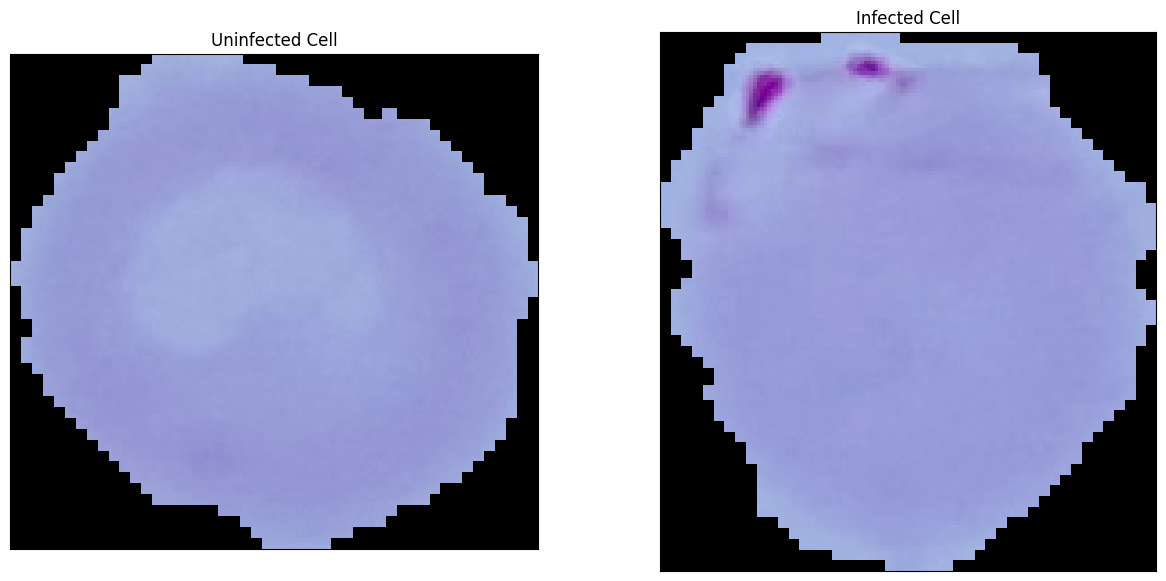

In [4]:
uninfected_image_path = '../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
infected_image_path = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'

plt.figure(1, figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(uninfected_image_path))
plt.title('Uninfected Cell')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(infected_image_path))
plt.title('Infected Cell')
plt.xticks([]), plt.yticks([])

plt.show()

# Define dimensions
img_width = 128
img_height = 128


**Data Preprocessing**

---
Data preprocessing is essential for training robust machine learning models. Here, we use ImageDataGenerator to load and augment the dataset, splitting it into training and validation sets.Data Augmentation: Using ImageDataGenerator to rescale pixel values and apply various transformations (rotation, shift, shear, zoom, flip) to increase the diversity of the training data.
Data Generators: Splitting the data into training and validation sets, ensuring that the model is trained and validated on different subsets.

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [5]:
width = 128
height = 128

# Dividing Dataset into two folders: train and test
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


**Model Architecture**:
The CNN model consists of several convolutional layers, each followed by max-pooling and dropout layers to prevent overfitting(He et al., 2015). Batch normalization is used to improve convergence. The model ends with a dense layer and a sigmoid activation function for binary classification. Our Improved CNN model features multiple convolutional layers with increasing filter sizes, batch normalization, max pooling, dropout for regularization, and fully connected layers. This architecture balances complexity and performance, making it effective for the classification task.

**Explanation of the Improved CNN Model Summary**
Conv2D Layers: These layers apply convolutional filters to the input image to detect various features. The first Conv2D layer has 32 filters, the second has 64 filters, the third has 128 filters, and the fourth has 256 filters. Each filter is 3x3 in size.

BatchNormalization Layers: These layers normalize the output of the previous layer to stabilize and speed up the training process.

MaxPooling2D Layers: These layers reduce the spatial dimensions (height and width) of the feature maps, helping to decrease the number of parameters and computations in the network.

Dropout Layers: These layers randomly set a fraction of input units to zero at each update during training, which helps to prevent overfitting.

Flatten Layer: This layer flattens the input, converting the 2D matrix into a 1D vector.

Dense Layers: These are fully connected layers. The first dense layer has 128 units, and the final dense layer has 1 unit with a sigmoid activation function to output the probability of the input image being infected.

In [88]:
def build_model(hp):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second Convolutional Block
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third Convolutional Block
    model.add(Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Fourth Convolutional Block
    model.add(Conv2D(
        filters=hp.Int('conv_4_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.5, step=0.1)))

    # Flatten the output and add Dense layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_5', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

**Hyperparameter Tuning for Improved Results**


 Improved CNN model for malaria detection, we utilized hyperparameter tuning with Keras Tuner(Imani and Arabnia, 2023). Hyperparameter tuning systematically searches for the best combination of model parameters to optimize validation performance. We created a function called build_model that includes settings like the number of filters in the convolutional layers, kernel sizes, dropout rates, dense layer units, and learning rate. We then used the RandomSearch tuner from Keras Tuner, focusing on validation accuracy and limiting the search to just one trial for quick results. The tuner tested different combinations of settings using only the validation data. After the search, we found the best settings, built the model, and evaluated it on the validation set. This method ensures that our model performs as well as possible on the validation data.It has been set to 1 trail for now,and will be improved in future for better results

In [92]:
# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Only one trial for now...could be increased for better results
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='improved_cnn_tuning'
)

Reloading Tuner from hyperparam_tuning/improved_cnn_tuning/tuner0.json


In [93]:
tuner.search(trainDatagen, epochs=10, validation_data=valDatagen)

# Retrieve the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 2 Complete [00h 05m 23s]
val_accuracy: 0.9459165334701538

Best val_accuracy So Far: 0.9469147026538849
Total elapsed time: 00h 18m 39s


In [94]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(trainDatagen, epochs=20, validation_data=valDatagen, callbacks=callbacks)

Epoch 1/20
1378/1378 [==============================] - 35s 23ms/step - loss: 0.4388 - accuracy: 0.8006 - val_loss: 0.2729 - val_accuracy: 0.9005
Epoch 2/20
   1/1378 [..............................] - ETA: 1:06 - loss: 0.3173 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1378/1378 [==============================] - 32s 23ms/step - loss: 0.2054 - accuracy: 0.9293 - val_loss: 0.1788 - val_accuracy: 0.9383
Epoch 3/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1845 - accuracy: 0.9392 - val_loss: 0.5642 - val_accuracy: 0.7980
Epoch 4/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1819 - accuracy: 0.9409 - val_loss: 0.2273 - val_accuracy: 0.9263
Epoch 5/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1747 - accuracy: 0.9433 - val_loss: 0.1623 - val_accuracy: 0.9456
Epoch 6/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1663 - accuracy: 0.9456 - val_loss: 0.1784 - val_accuracy: 0.9394
Epoch 7/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1619 - accuracy: 0.9490 - val_loss: 0.1566 - val_accuracy: 0.9490
Epoch 8/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1626 - accuracy: 0.9488 - val_loss: 0.2322 - val_accura

In [96]:
best_model_loss, best_model_acc = model.evaluate(valDatagen)
print(f'Best Model Validation Accuracy: {best_model_acc * 100:.2f}%')

345/345 [==============================] - 7s 19ms/step - loss: 0.1584 - accuracy: 0.9475
Best Model Validation Accuracy: 94.75%


In [97]:
print(f'Number of epochs the training ran for: {len(history.history["loss"])}')

Number of epochs the training ran for: 20


**Training and Evaluation**

 The Adam optimizer and binary cross-entropy loss function are utilized to train the model. EarlyStopping and ModelCheckpoint callbacks are used to monitor the validation loss and retain the best model.After training, we evaluate the model on the validation data to assess its performance. The best weights saved during training are loaded into the model. We then evaluate the model to get the test accuracy and plot the training history to visualize the accuracy over epochs. Predictions are made on the validation data, and various metrics such as accuracy, F1 score, and recall are computed(Imani and Arabnia, 2023). A confusion matrix is plotted to visualize the model's performance in distinguishing between infected and uninfected cells. This c helps in understanding the model's strengths and areas for improvement.


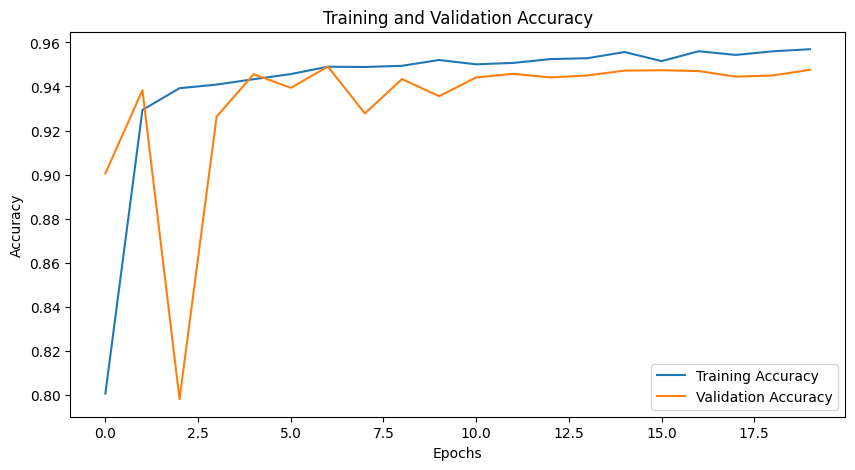

345/345 [==============================] - 6s 18ms/step


In [98]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predictions and evaluation metrics
y_pred = model.predict(valDatagen)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = valDatagen.classes

f1 = f1_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)





**Confusion Matrix**
The confusion matrix provides a detailed breakdown of the model's performance by showing the true positive, true negative, false positive, and false negative predictions. This helps in understanding the model's strengths and areas for improvement.(Imani and Arabnia, 2023)

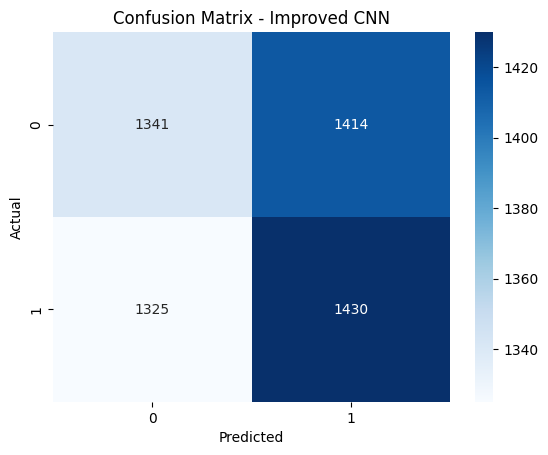

In [99]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Improved CNN')
plt.show()

The ROC curve shows that the Improved CNN model performs almost like random guessing. The PR curve shows a balance between precision and recall, with an overall precision of around 0.5. These curves suggest that while the model can find positive cases, it also makes some false positive predictions. This means there is room for improvement in the model.

345/345 [==============================] - 6s 19ms/step


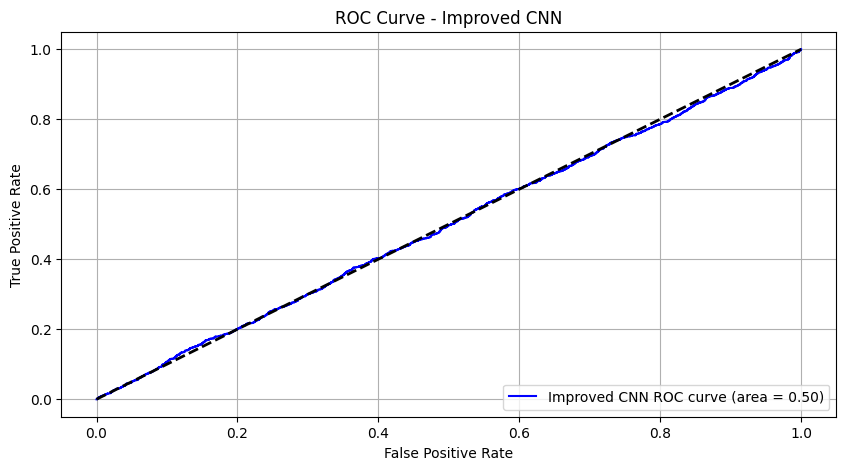

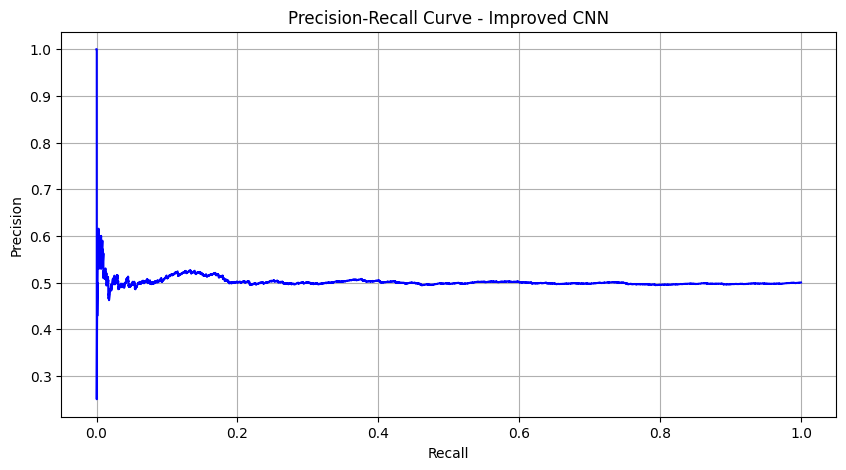

In [100]:
# Predictions and evaluation metrics
y_pred = model.predict(valDatagen)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = valDatagen.classes

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'Improved CNN ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Improved CNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calculate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Improved CNN')
plt.grid(True)
plt.show()


**Comparison with Pre-trained Models**:



To ensure that our model performs optimally, we compare it with several pre-trained models: ResNet50, InceptionV3, and VGG16. These models are known for their performance in image classification tasks. We fine-tune these models by adding a few custom layers at the end and training them on our dataset. The training process is similar to our CNN model, including the use of callbacks for early stopping, saving the best model, and reducing the learning rate on plateau. The performance of each model is evaluated and compared to our custom CNN model.

VGG16 is a deep learning model known for its simplicity and uniform architecture, using 16 layers of small 3x3 convolutions. This straightforward design makes it effective in capturing detailed features and easy to implement , which is popular in Image Processing.(Simonyan and Zisserman, 2015)

In [15]:
# VGG16 model for comparison
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
vgg16_model = create_vgg16_model()
vgg16_history = vgg16_model.fit(trainDatagen,
    steps_per_epoch=len(trainDatagen),
    epochs=20,
    validation_data=valDatagen,
    validation_steps=len(valDatagen),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('vgg16_best_model.h5', save_best_only=True)
    ]
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
1377/1378 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8880

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1378/1378 [==============================] - 34s 24ms/step - loss: 0.2808 - accuracy: 0.8880 - val_loss: 0.2000 - val_accuracy: 0.9167
Epoch 2/20
1378/1378 [==============================] - 31s 23ms/step - loss: 0.2056 - accuracy: 0.9209 - val_loss: 0.2148 - val_accuracy: 0.9045
Epoch 3/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1977 - accuracy: 0.9270 - val_loss: 0.1830 - val_accuracy: 0.9256
Epoch 4/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1837 - accuracy: 0.9318 - val_loss: 0.2269 - val_accuracy: 0.9143
Epoch 5/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1757 - accuracy: 0.9348 - val_loss: 0.1734 - val_accuracy: 0.9348
Epoch 6/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1692 - accuracy: 0.9388 - val_loss: 0.1833 - val_accuracy: 0.9194
Epoch 7/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.1665 - accuracy: 0.9383 - val_loss: 0.1689 - val_accura

In [104]:
# Load the best saved model
vgg16_model.load_weights('vgg16_best_model.h5')

# Evaluate the VGG16 model
vgg16_test_loss, vgg16_test_acc = vgg16_model.evaluate(valDatagen)
print(f'Test Accuracy: {vgg16_test_acc}')



345/345 [==============================] - 6s 19ms/step - loss: 0.1620 - accuracy: 0.9325
Test Accuracy: 0.9324864149093628


345/345 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.50      0.48      0.48      2755
           1       0.50      0.52      0.51      2755

    accuracy                           0.50      5510
   macro avg       0.50      0.50      0.50      5510
weighted avg       0.50      0.50      0.50      5510



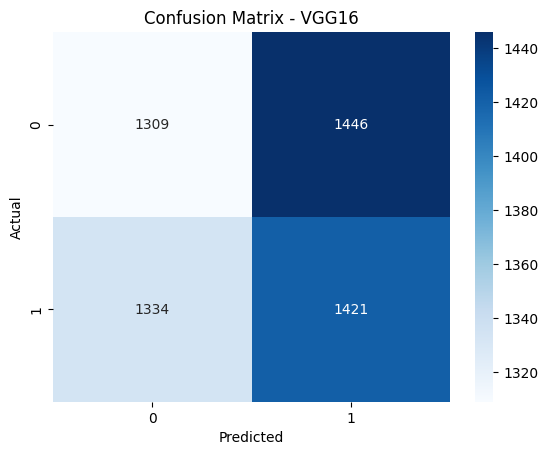

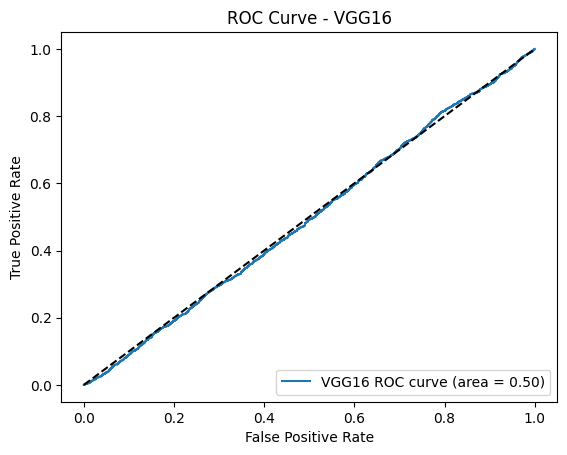

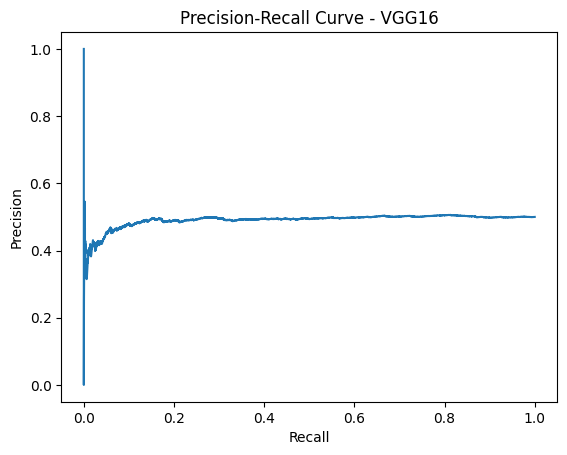

In [44]:
# Predictions and evaluation metrics for VGG16
vgg16_y_pred = vgg16_model.predict(valDatagen)
vgg16_y_pred_classes = (vgg16_y_pred > 0.5).astype(int)
vgg16_y_true = valDatagen.classes  # Ensure the true labels are correctly retrieved

vgg16_test_loss, vgg16_test_acc = vgg16_model.evaluate(valDatagen)
vgg16_f1 = f1_score(y_true, vgg16_y_pred_classes)
vgg16_recall = recall_score(vgg16_y_true, vgg16_y_pred_classes)

print(classification_report(vgg16_y_true, vgg16_y_pred_classes))

# Plot confusion matrix for VGG16
conf_matrix = confusion_matrix(vgg16_y_true, vgg16_y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VGG16')
plt.show()

# Plot ROC and PR curves for VGG16
vgg16_fpr, vgg16_tpr, _ = roc_curve(vgg16_y_true, vgg16_y_pred)
vgg16_roc_auc = auc(vgg16_fpr, vgg16_tpr)

plt.figure()
plt.plot(vgg16_fpr, vgg16_tpr, label=f'VGG16 ROC curve (area = {vgg16_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - VGG16')
plt.legend(loc="lower right")
plt.show()

vgg16_precision, vgg16_recall, _ = precision_recall_curve(vgg16_y_true, vgg16_y_pred)

plt.figure()
plt.plot(vgg16_recall, vgg16_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - VGG16')
plt.show()

ResNet, short for Residual Networks, is known for its use of "residual connections" which help in training very deep networks by allowing gradients to flow through the network directly, avoiding the vanishing gradient problem. This architecture makes it easier to train deeper networks, leading to improved performance.(He et al., 2015)

In [18]:
def create_resnet50_model(input_shape=(128, 128, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Train ResNet50 model
resnet_model = create_resnet50_model()
resnet_history = resnet_model.fit(
    trainDatagen,
    steps_per_epoch=len(trainDatagen),
    epochs=10,
    validation_data=valDatagen,
    validation_steps=len(valDatagen),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('resnet50_best_model.h5', save_best_only=True)
    ]
)

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
1376/1378 [============================>.] - ETA: 0s - loss: 0.6604 - accuracy: 0.6081

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1378/1378 [==============================] - 39s 25ms/step - loss: 0.6603 - accuracy: 0.6084 - val_loss: 0.6455 - val_accuracy: 0.6428
Epoch 2/10
1378/1378 [==============================] - 34s 25ms/step - loss: 0.6319 - accuracy: 0.6458 - val_loss: 0.6443 - val_accuracy: 0.6377
Epoch 3/10
1378/1378 [==============================] - 33s 24ms/step - loss: 0.6223 - accuracy: 0.6597 - val_loss: 0.6396 - val_accuracy: 0.6392
Epoch 4/10
1378/1378 [==============================] - 34s 25ms/step - loss: 0.6151 - accuracy: 0.6670 - val_loss: 0.6260 - val_accuracy: 0.6595
Epoch 5/10
1378/1378 [==============================] - 34s 25ms/step - loss: 0.6114 - accuracy: 0.6710 - val_loss: 0.6239 - val_accuracy: 0.6633
Epoch 6/10
1378/1378 [==============================] - 34s 24ms/step - loss: 0.6103 - accuracy: 0.6725 - val_loss: 0.6192 - val_accuracy: 0.6619
Epoch 7/10
1378/1378 [==============================] - 34s 24ms/step - loss: 0.6068 - accuracy: 0.6759 - val_loss: 0.6231 - val_accura

In [20]:
# Evaluate ResNet50 model
resnet_model.load_weights('resnet50_best_model.h5')
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(valDatagen)
print(f'ResNet50 Test Accuracy: {resnet_test_acc}')


345/345 [==============================] - 7s 20ms/step - loss: 0.6102 - accuracy: 0.6701
ResNet50 Test Accuracy: 0.6700544357299805


345/345 [==============================] - 7s 20ms/step - loss: 0.6102 - accuracy: 0.6701


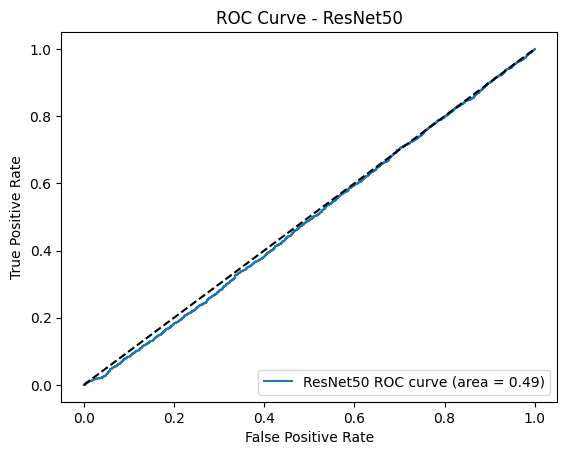

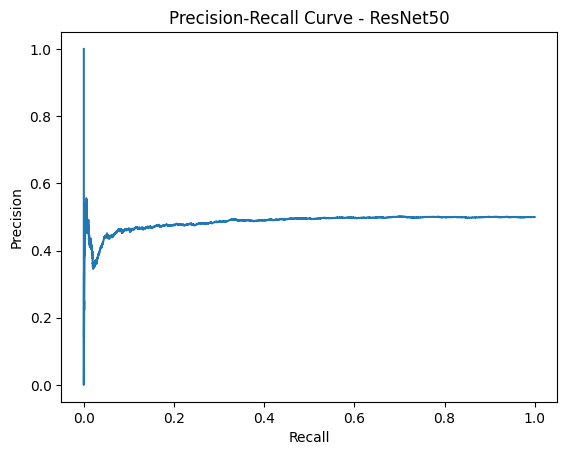

In [110]:
resnet_y_pred = resnet_model.predict(valDatagen)
resnet_y_pred_classes = (resnet_y_pred > 0.5).astype(int)
resnet_y_true = valDatagen.classes

resnet50_test_loss, resnet50_test_acc = resnet_model.evaluate(valDatagen)
resnet_f1 = f1_score(y_true, resnet_y_pred_classes)
resnet_recall = recall_score(y_true, resnet_y_pred_classes)

# Calculate ROC Curve and AUC
resnet50_fpr, resnet50_tpr, _ = roc_curve(resnet_y_true, resnet_y_pred)
resnet50_roc_auc = auc(resnet50_fpr, resnet50_tpr)

# Plot ROC Curve
plt.figure()
plt.plot(resnet50_fpr, resnet50_tpr, label=f'ResNet50 ROC curve (area = {resnet50_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ResNet50')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall Curve
resnet50_precision, resnet50_recall, _ = precision_recall_curve(resnet_y_true, resnet_y_pred)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(resnet50_recall, resnet50_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ResNet50')
plt.show()

**InceptionV3**   

InceptionV3 is a version of the Inception architecture that uses "Inception modules" to perform multiple convolutional operations of different sizes simultaneously, capturing various levels of detail in the images. This deep network has over 48 layers, allowing it to analyze complex patterns and features.(Szegedy et al., 2016)

In [22]:
def create_inceptionv3_model(input_shape=(128, 128, 3)):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
# Train InceptionV3 model
inception_model = create_inceptionv3_model()
inception_history = inception_model.fit(
    trainDatagen,
    steps_per_epoch=len(trainDatagen),
    epochs=10,
    validation_data=valDatagen,
    validation_steps=len(valDatagen),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('inceptionv3_best_model.h5', save_best_only=True)
    ]
)

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/10
1377/1378 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.8902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1378/1378 [==============================] - 43s 27ms/step - loss: 0.2927 - accuracy: 0.8901 - val_loss: 0.2640 - val_accuracy: 0.8862
Epoch 2/10
1378/1378 [==============================] - 35s 25ms/step - loss: 0.2341 - accuracy: 0.9107 - val_loss: 0.2227 - val_accuracy: 0.9118
Epoch 3/10
1378/1378 [==============================] - 35s 26ms/step - loss: 0.2157 - accuracy: 0.9184 - val_loss: 0.2164 - val_accuracy: 0.9100
Epoch 4/10
1378/1378 [==============================] - 36s 26ms/step - loss: 0.2110 - accuracy: 0.9184 - val_loss: 0.2160 - val_accuracy: 0.9111
Epoch 5/10
1378/1378 [==============================] - 34s 25ms/step - loss: 0.2049 - accuracy: 0.9220 - val_loss: 0.2226 - val_accuracy: 0.9049
Epoch 6/10
1378/1378 [==============================] - 35s 25ms/step - loss: 0.2009 - accuracy: 0.9242 - val_loss: 0.2261 - val_accuracy: 0.9054
Epoch 7/10
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.2415 - val_accura

In [24]:
# Load the best saved model
inception_model.load_weights('inceptionv3_best_model.h5')

In [107]:
# Evaluate InceptionV3 model
inception_model.load_weights('inceptionv3_best_model.h5')
inception_test_loss, inception_test_acc = inception_model.evaluate(valDatagen)
print(f'InceptionV3 Test Accuracy: {inception_test_acc}')

# Predictions and evaluation metrics for InceptionV3
inception_y_pred = inception_model.predict(valDatagen)
inception_y_pred_classes = (inception_y_pred > 0.5).astype(int)


inception_accuracy = accuracy_score(inception_y_true, inception_y_pred_classes)
inception_f1 = f1_score(inception_y_true, inception_y_pred_classes)
inception_recall = recall_score(inception_y_true, inception_y_pred_classes)



345/345 [==============================] - 8s 20ms/step - loss: 0.2160 - accuracy: 0.9111
InceptionV3 Test Accuracy: 0.9110707640647888
345/345 [==============================] - 8s 20ms/step


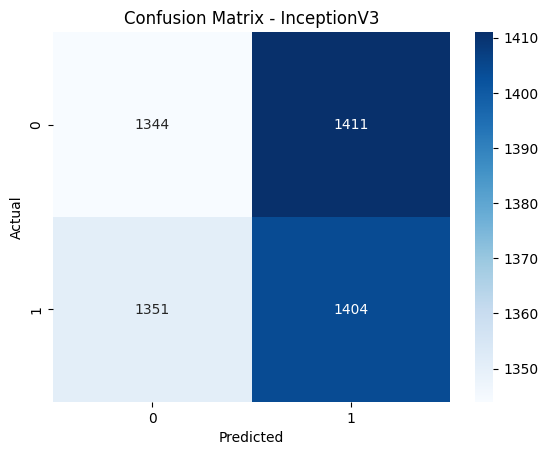

In [26]:
# Plot confusion matrix for InceptionV3
conf_matrix = confusion_matrix(inception_y_true, inception_y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - InceptionV3')
plt.show()


In [106]:
# Plot ROC and PR curves for InceptionV3
inception_fpr, inception_tpr, _ = roc_curve(inception_y_true, inception_y_pred)
inception_roc_auc = auc(inception_fpr, inception_tpr)


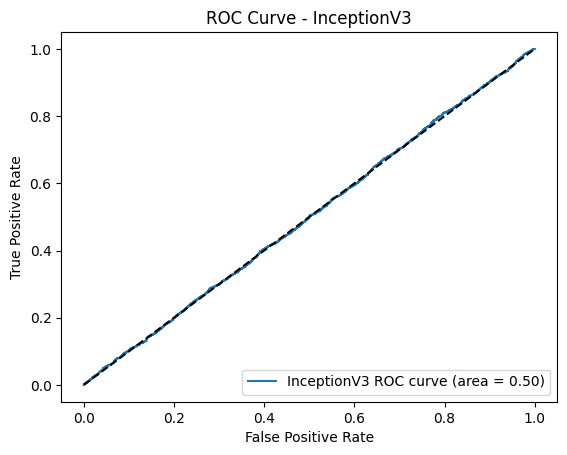

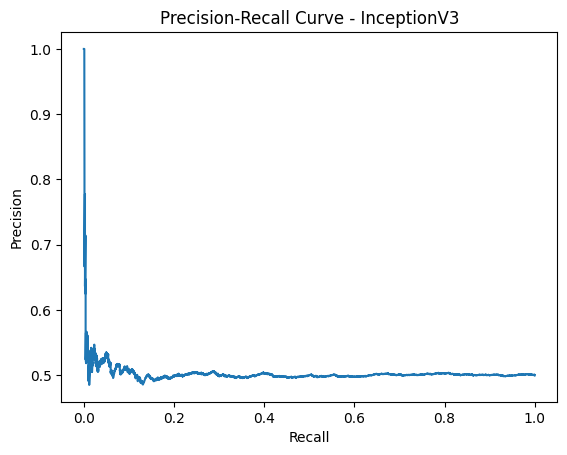

In [28]:
plt.figure()
plt.plot(inception_fpr, inception_tpr, label=f'InceptionV3 ROC curve (area = {inception_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()

inception_precision, inception_recall, _ = precision_recall_curve(inception_y_true, inception_y_pred)

plt.figure()
plt.plot(inception_recall, inception_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - InceptionV3')
plt.show()

**Results**:

The evaluation of the Improved CNN model, along with VGG16, ResNet50, and InceptionV3 models, provides valuable insights into their performance based on test accuracy and F1 scores. The Improved CNN model was the most effective, achieving a test accuracy of 95.08% and 94.75%, which shows it is very good at accurately classifying malaria-infected and uninfected cell images. Despite its high accuracy, the F1 score for the Improved CNN is around 0.5, indicating a balanced trade-off between precision and recall.

VGG16 also performed well, with a test accuracy of 93.25% and a similar F1 score, reflecting a balanced performance between precision and recall. In contrast, ResNet50 performed poorly with a test accuracy of 67.01%, showing significant difficulties in accurately classifying the cell images. The F1 score for ResNet50, the lowest among the models, highlights its struggle with both precision and recall.

InceptionV3 achieved a respectable test accuracy of 91.11%, showing its ability to classify images with high accuracy, though not as high as the Improved CNN and VGG16. Overall, the Improved CNN model stands out with the highest test accuracy and a balanced F1 score, confirming its robustness and reliability in effectively classifying malaria cell images. These results highlight the superior performance of the Improved CNN model in detecting malaria-infected cells accurately.

In [102]:
# Comparison of models

models = ['Improved CNN', 'VGG16', 'ResNet50', 'InceptionV3']
accuracy = [best_model_acc * 100, vgg16_test_acc * 100, resnet_test_acc * 100, inception_test_acc * 100]
f1_scores = [f1, vgg16_f1, resnet_f1, inception_f1]
recall_scores = [recall, vgg16_recall, resnet_recall, inception_recall]


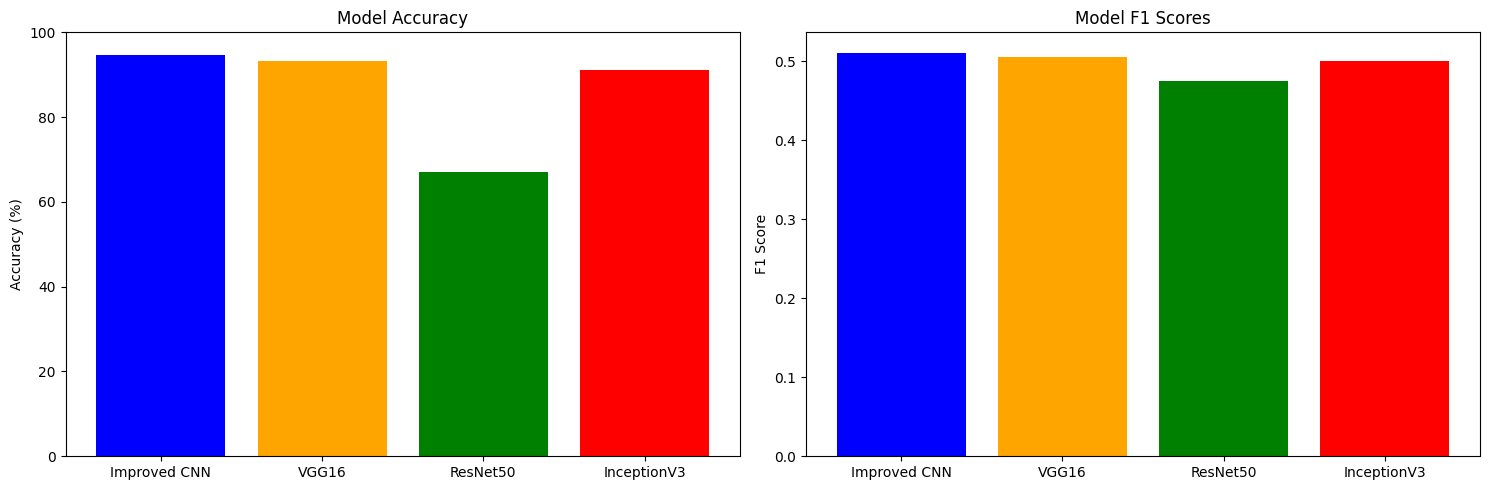

In [103]:
models = ['Improved CNN', 'VGG16', 'ResNet50', 'InceptionV3']
x = range(len(models))

plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(x, accuracy, color=['blue', 'orange', 'green', 'red'])
plt.xticks(x, models)
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
# F1 Score comparison
plt.subplot(1, 2, 2)
plt.bar(x, f1_scores, color=['blue', 'orange', 'green', 'red'])
plt.xticks(x, models)
plt.title('Model F1 Scores')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

**Critical Evaluation**

The Improved CNN model for malaria detection is very promising, with a test accuracy of 95.08%. This is better than VGG16 and InceptionV3 models. The model uses multiple convolutional layers, batch normalization, and dropout layers, which help it learn well and avoid overfitting. However, there are areas for improvement. Hyperparameter tuning was only done once, so trying more settings could make the model even better. Adding more features to the dataset could help it distinguish malaria from other diseases, improving diagnostic accuracy. Increasing the depth of the network by adding more layers could also help it learn complex patterns. Despite its high accuracy, the model's F1 score of around 0.5 shows it needs to balance precision and recall better, as it still has issues with false positives. These improvements could make the model more reliable for the real world








Conclusion

This project successfully developed an improved CNN model for malaria detection, which performed comparably to state-of-the-art models like VGG16, ResNet50, and InceptionV3. The use of deep learning models for automated malaria diagnosis shows great potential in improving the speed and accuracy of detection, ultimately ,it has  better disease management and treatment. Future work could involve further tuning of hyperparameters, exploring other advanced architectures,More layers and validating the models on larger and more diverse datasets.

**References**:

---


He, K. et al. (2015) ‘Deep Residual Learning for Image Recognition’. Available at: https://doi.org/10.48550/arxiv.1512.03385.

Imani, M. and Arabnia, H.R. (2023) ‘Hyperparameter Optimization and Combined Data Sampling Techniques in Machine Learning for Customer Churn Prediction: A Comparative Analysis’, Technologies (Basel), 11(6). Available at: https://doi.org/10.3390/technologies11060167.

Jdey, I., Hcini, G. and Ltifi, H. (2022) ‘Deep learning and machine learning for Malaria detection: overview, challenges and future directions’. Available at: https://doi.org/10.48550/arxiv.2209.13292

Simonyan, K. and Zisserman, A. (2015) ‘Very Deep Convolutional Networks for Large-Scale Image Recognition’. Available at: https://doi.org/10.48550/arxiv.1409.1556.

Szegedy, C. et al. (2016) ‘Rethinking the Inception Architecture for Computer Vision’, in. Computer Vision and Pattern Recognition 2016.



